In [1]:
import os
import numpy as np
from numpy import random
import matplotlib
import pandas as pd
import pickle
import time
matplotlib.use('Tkagg')
import random as rd
from matplotlib import pyplot as plt
from keras import metrics

/home/haoyuan/.conda/envs/coding/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [48]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Flatten
import tensorflow as tf
#%matplotlib inline 
#%matplotlib notebook

In [28]:
plt.rc('font', size=14)
plt.rc('font', family='Arial')
plt.rc('mathtext', fontset='custom')
plt.rc('mathtext', rm='Arial')
plt.rc('mathtext', sf='Arial')
plt.rc('mathtext', it='Arial:italic')
plt.rc('mathtext', bf='Arial:bold')
plt.rc('lines', linewidth=1)
plt.rc('axes', linewidth=2)

In [3]:
input_set = pd.read_csv("input.txt",dtype = np.float32, header = None)

In [4]:
output_T = pd.read_csv("output_T.txt",header = None)

In [5]:
output_S = pd.read_csv("output_S.txt",header = None)

In [6]:
input_tr = input_set.sample(frac=0.8, random_state=25)
input_te = input_set.drop(input_tr.index)

In [7]:
output_T_tr = output_T.sample(frac=0.8, random_state=25)
output_T_te = output_T.drop(output_T_tr.index)

In [8]:
output_S_tr = output_S.sample(frac=0.8, random_state=25)
output_S_te = output_S.drop(output_S_tr.index)

In [9]:
### hyperparameter settings and other constants
batch_size = 32
epochs = 20
d1 = 1024
d2 = 256
alpha_adam = 0.001
rho1 = 0.99
rho2 = 0.999
### end hyperparameter settings


In [10]:
def evaluate_model(Xs, Ys, model):
    (loss, accuracy) = model.evaluate(Xs, Ys)
    return (loss, accuracy)

In [35]:
def plot_fig(historysgd1,loss_te_sgd1,accuracy_te_sgd1,name):
    matplotlib.rcParams['figure.figsize'] = [12, 4]
    fig, axs = plt.subplots(1,2)
    axs[0].plot(historysgd1.history['loss'],linewidth = 2)
    axs[0].plot(historysgd1.history['val_loss'],linewidth = 2)
    axs[0].plot([loss_te_sgd1 for i in range(epochs)],linewidth = 2)
    axs[0].title.set_text('Loss')
    axs[0].set(xlabel= 'Epochs', ylabel = 'Loss')
    axs[0].legend(['Training data', 'Validation data','Test data'])

    axs[1].plot(100 - np.array(historysgd1.history['mean_absolute_percentage_error']),linewidth = 2)
    axs[1].plot(100 - np.array(historysgd1.history['val_mean_absolute_percentage_error']),linewidth = 2)
    axs[1].plot([100 - accuracy_te_sgd1 for i in range(epochs)],linewidth = 2)
    axs[1].title.set_text('Accuracy')
    axs[1].set(xlabel= 'Epochs', ylabel = 'Accuracy %')
    axs[1].legend(['Training data', 'Validation data','Test data'])
    plt.tight_layout()
    plt.savefig(name,dpi=1000);
    plt.show()

In [29]:
def train_fully_connected_adam(Xs, Ys, d1, d2, alpha, rho1, rho2, B, epochs):
    n,i = Xs.shape
    model = tf.keras.Sequential()
    model.add(Dense(26))
    model.add(Dense(d1, activation='relu'))
    model.add(Dense(d2, activation='relu'))
    model.add(Dense(26))
    model.compile(loss=tf.keras.losses.MeanSquaredError(), 
                  optimizer=tf.keras.optimizers.Adam(learning_rate=alpha, beta_1=rho1, beta_2=rho2, epsilon=1e-07), 
                  metrics=[metrics.mean_absolute_percentage_error])
    history = model.fit(Xs, Ys, batch_size=B, epochs=epochs, validation_split=0.1)
    return (model, history)

In [134]:
start = time.time()
modeladam, historyadam = train_fully_connected_adam(input_tr, output_T_tr, d1, d2, alpha_adam, rho1, rho2, batch_size, epochs)
print(time.time() - start)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 1073.0710 - mean_absolute_percentage_error: 49.6913 - val_loss: 276.9729 - val_mean_absolute_percentage_error: 26.7824
Epoch 2/20
225/225 [==============================] - 1s 6ms/step - loss: 164.5522 - mean_absolute_percentage_error: 18.9948 - val_loss: 96.0823 - val_mean_absolute_percentage_error: 14.5724
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 62.2071 - mean_absolute_percentage_error: 12.1470 - val_loss: 35.7343 - val_mean_absolute_percentage_error: 10.1051
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 26.0044 - mean_absolute_percentage_error: 9.4151 - val_loss: 20.4389 - val_mean_absolute_percentage_error: 8.8048
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 17.6155 - mean_absolute_percentage_error: 8.1037 - val_loss: 15.0017 - val_mean_absolute_percentage_error: 7.5927
Epoch 6/20
225/225 [==============================

In [14]:
loss_te_adam, accuracy_te_adam = evaluate_model(input_te, output_T_te, modeladam)

63/63 [==============================] - 0s 4ms/step - loss: 0.6758 - mean_absolute_percentage_error: 1.6466


<IPython.core.display.Javascript object>


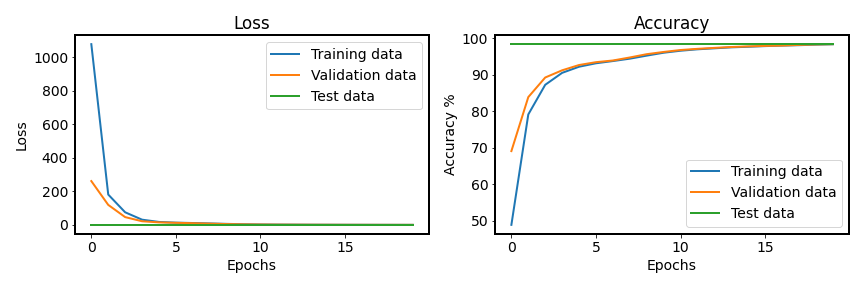

In [36]:
plot_fig(historyadam, loss_te_adam, accuracy_te_adam, name = "NN_T")

In [139]:
[100 - accuracy_te_adamS for i in range(epochs)]

[93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308,
 93.13463926315308]

In [135]:
start = time.time()
modeladamS, historyadamS = train_fully_connected_adam(input_tr, output_S_tr/1e7, d1, d2, alpha_adam, rho1, rho2, batch_size, epochs)
print(time.time() - start)

Epoch 1/20
225/225 [==============================] - 2s 7ms/step - loss: 2.2119 - mean_absolute_percentage_error: 61.7170 - val_loss: 1.1261 - val_mean_absolute_percentage_error: 47.8990
Epoch 2/20
225/225 [==============================] - 1s 6ms/step - loss: 0.6797 - mean_absolute_percentage_error: 39.0745 - val_loss: 0.4529 - val_mean_absolute_percentage_error: 31.5974
Epoch 3/20
225/225 [==============================] - 1s 6ms/step - loss: 0.3236 - mean_absolute_percentage_error: 29.2908 - val_loss: 0.2639 - val_mean_absolute_percentage_error: 26.6657
Epoch 4/20
225/225 [==============================] - 1s 6ms/step - loss: 0.2016 - mean_absolute_percentage_error: 23.9907 - val_loss: 0.1691 - val_mean_absolute_percentage_error: 21.1875
Epoch 5/20
225/225 [==============================] - 1s 6ms/step - loss: 0.1264 - mean_absolute_percentage_error: 19.8001 - val_loss: 0.1110 - val_mean_absolute_percentage_error: 18.3310
Epoch 6/20
225/225 [==============================] - 1s 6ms

In [18]:
loss_te_adamS, accuracy_te_adamS = evaluate_model(input_te, output_S_te/1e7, modeladamS)

63/63 [==============================] - 0s 4ms/step - loss: 0.0144 - mean_absolute_percentage_error: 6.8654


<IPython.core.display.Javascript object>


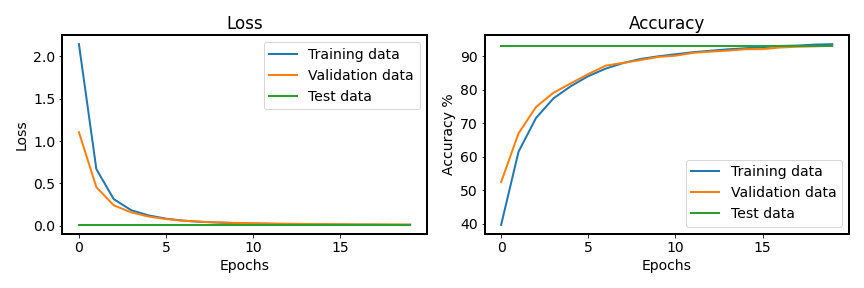

In [98]:
plot_fig(historyadamS, loss_te_adamS, accuracy_te_adamS, name = "NN_S")

In [20]:
def Rand_properties():
    matRan = [rd.randint(0,1) for i in range(26)];
    return matRan

In [21]:
def PredSample_gen(sd, input_set, NSample):
    rd.seed(sd)
    predict_set = np.zeros([NSample,26])
    iNum = 0
    while (iNum < NSample):
        ran = Rand_properties()
        if ((ran == input_set).all(1).any() == False):
            predict_set[iNum] = ran
            iNum += 1
    return predict_set
        

In [39]:
predict_set = PredSample_gen(6532, input_set, 100000)

In [40]:
predict_set.shape

(100000, 26)

In [41]:
start = time.time()
p  = modeladam.predict(predict_set)
print(time.time() - start)

3125/3125 [==============================] - 10s 3ms/step
11.182687520980835


In [46]:
start = time.time()
pS  = modeladamS.predict(predict_set)
print(time.time() - start)

3125/3125 [==============================] - 9s 3ms/step
10.157930135726929


In [42]:
output_T_p = pd.read_csv("output_T_p.txt",header = None)

In [43]:
output_S_p = pd.read_csv("output_S_p.txt",header = None)

<IPython.core.display.Javascript object>


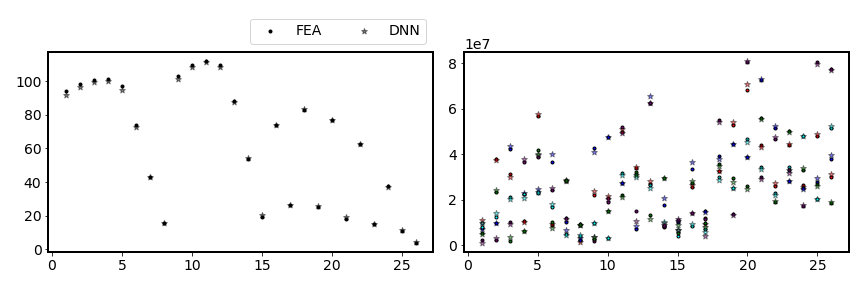

In [133]:
color = ["red", "blue", "cyan", "purple", "green"]
label = ["New 1","New 2","New 3","New 4","New 5"]
fig, axs = plt.subplots(1,2)
for i in range(5):
    #axs[0].scatter(np.arange(1,27), output_T_p.T[i], marker = ".", edgecolor = "black", color = color[i], label = label[i])
    #axs[0].scatter(np.arange(1,27),p[:5][i], marker = "*", edgecolor = "black",alpha = 0.5, color = color[i])
    axs[1].scatter(np.arange(1,27),output_S_p.T[i], edgecolor = "black",marker = ".", color = color[i], label = label[i])
    axs[1].scatter(np.arange(1,27),(pS[:5]*1e7)[i], edgecolor = "black",marker = "*", alpha = 0.5, color = color[i])
#axs[1].legend(ncol = 5, bbox_to_anchor=(0., 1.2))
axs[0].scatter(np.arange(1,27), output_T_p.T[i], marker = ".", edgecolor = "black", color = "black", label = "FEA")
axs[0].scatter(np.arange(1,27),p[:5][i], marker = "*", edgecolor = "black",alpha = 0.5, color = "black", label = "DNN")
axs[0].legend(ncol = 5, bbox_to_anchor=(1.0, 1.2))
plt.tight_layout()
plt.savefig("pre_legend2.png",dpi=1000);
plt.show()

In [84]:
p[:5][i]

array([ 92.088974,  96.61821 ,  99.78674 , 100.1614  ,  94.95035 ,
        72.687065,  43.05452 ,  15.399075, 101.71883 , 108.67454 ,
       111.76745 , 108.65058 ,  87.86675 ,  54.5756  ,  20.107994,
        73.91226 ,  26.073288,  83.58431 ,  25.512909,  77.255356,
        18.8513  ,  62.523567,  15.084943,  37.050713,  11.562304,
         4.070641], dtype=float32)

In [57]:
output_T_p.T

,0,1,2,3,4
0,108.544,99.319,97.504,77.358,94.437
1,111.203,104.674,98.933,84.917,98.323
2,112.447,108.873,103.013,96.617,101.132
3,110.767,107.952,106.735,103.372,101.302
4,105.672,101.052,101.918,99.475,97.156
5,88.217,89.036,87.926,83.576,73.904
6,61.726,58.587,56.660,47.552,43.111
7,24.965,17.707,17.217,12.518,15.580
8,113.200,109.454,102.309,93.765,103.036
9,115.785,113.385,110.427,106.744,109.943
